In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Traffic light').getOrCreate()

22/06/24 03:19:24 WARN Utils: Your hostname, michael-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
22/06/24 03:19:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/06/24 03:19:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
spark

In [3]:
#!pip install matplotlib

In [4]:
#!pip install pandas

In [5]:
#!pip install plotly

In [6]:
from pyspark.sql.functions import col,broadcast
from pyspark.sql import functions as F
from matplotlib import pyplot as plt
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [7]:
accident_info = spark.read.csv("Accident_Information.csv",header=True,inferSchema=True)

In [8]:
vehicle_info = spark.read.csv("Vehicle_Information.csv",header=True,inferSchema=True)

In [9]:
combinedDF = vehicle_info.join(accident_info,['Accident_Index'],'inner').drop(vehicle_info.Year)

In [10]:
#combineDF = combinedDF.na.drop(how="any").show()

In [11]:
combinedDF.filter((combinedDF['Sex_of_Driver'] == 'Male') & (col('Age_Band_of_Driver').like('26%'))).limit(10).show()

22/06/24 03:19:49 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------+------------------+--------------+---------------------+-----------------+--------------------+-------------------------+--------------------------+-------------------------+--------------------+------------+------------------+---------------+-------------+------------------------+-----------------------+---------------------------+--------------------------------+--------------------+-----------------+--------------------+---------------------------+--------------------+--------------+---------------+--------------+---------------+-----------------+-------------------+-------------------+-----------+-------------------------------------------+--------------------+--------------------+---------+--------------------+--------------------------+-------------------------+---------------------+----------------------+---------+-------------------------+--------------------+------------------+---------------------------------+---------------------------------------+-----------

In [12]:
combinedDF.show()
combinedDF.printSchema()

+--------------+--------------------+--------------+---------------------+-----------------+--------------------+-------------------------+--------------------------+-------------------------+--------------------+----------+--------------------+---------------+-------------+------------------------+-----------------------+---------------------------+--------------------------------+--------------------+-----------------+--------------------+---------------------------+--------------------+--------------+---------------+--------------+---------------+-----------------+-------------------+-------------------+-----------+-------------------------------------------+--------------------+--------------------+---------+--------------------+--------------------------+-------------------------+---------------------+----------------------+---------+-------------------------+--------------------+------------------+---------------------------------+---------------------------------------+---------

In [13]:
dataDF=combinedDF.select(combinedDF.Accident_Index,combinedDF.Year,combinedDF.Number_of_Casualties).groupBy('Year').agg({'Accident_Index' : 'count'}).orderBy('Year').toPandas()

In [14]:
year = dataDF['Year'].tolist()

casualties = dataDF['count(Accident_Index)'].tolist()

In [15]:
trace = go.Bar(
    x=year,
    y=casualties,
    name='Female Drivers',
    marker=dict(color='#f7bb31'),
    opacity=0.8
)
data = [trace]
layout = go.Layout(
    barmode='group',
    legend=dict(dict(x=-.1, y=1.2)),
    margin=dict(b=120),
    title = 'Number of Casualties per Year',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

plt.show()

In [16]:
vehicle_ManoeuvreDF=combinedDF.select('Accident_Index','Vehicle_Manoeuvre').groupBy('Vehicle_Manoeuvre').agg({'Accident_Index' : 'count'}).orderBy('count(Accident_Index)').limit(5).toPandas()

22/06/24 03:21:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:08 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


In [17]:
manoeuvre = vehicle_ManoeuvreDF['Vehicle_Manoeuvre'].tolist()

count_manoeuvre = vehicle_ManoeuvreDF['count(Accident_Index)'].tolist()

In [18]:
pie_visual = go.Pie(labels=manoeuvre, values=count_manoeuvre, marker=dict(colors=['#25e475', '#ee1c96',]))

layout = go.Layout(title='Reason of Accident', width=800, height=500)
fig = go.Figure(data=[pie_visual], layout=layout)
iplot(fig)

In [19]:
genderDF=combinedDF.select('Accident_Index','Year','Age_Band_of_Driver','Sex_of_Driver').groupBy('Sex_of_Driver','Age_Band_of_Driver').agg({'Accident_Index' : 'count'}).orderBy('count(Accident_Index)',ascending=False).toPandas()

22/06/24 03:21:17 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:17 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:17 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:17 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:17 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:17 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


In [20]:
maleDF=genderDF[genderDF['Sex_of_Driver']=='Male'].head(6)
male_age_band=maleDF['Age_Band_of_Driver'].tolist()
male_accident_count=maleDF['count(Accident_Index)'].tolist()

In [21]:
femaleDF=genderDF[genderDF['Sex_of_Driver']=='Female'].head(6)
female_age_band=femaleDF['Age_Band_of_Driver'].tolist()
female_accident_count=femaleDF['count(Accident_Index)'].tolist()

In [22]:
trace1 = go.Bar(
    x=male_age_band,
    y=male_accident_count,
    name='Male Drivers',
    marker=dict(color='#f259d6'),
    opacity=0.8
)
trace2 = go.Bar(
    x=female_age_band,
    y=female_accident_count,
    name='Female Drivers',
    marker=dict(color='#f7bb31'),
    opacity=0.8
)
data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    legend=dict(dict(x=-.1, y=1.2)),
    margin=dict(b=120),
    title = 'Accidents categorized by gender',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

plt.show()

In [23]:
journey_purposeDF=combinedDF.select('Accident_Index','Journey_Purpose_of_Driver').groupBy('Journey_Purpose_of_Driver').agg({'Accident_Index' : 'count'}).orderBy('count(Accident_Index)',ascending=False).toPandas()

22/06/24 03:21:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:25 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


In [24]:
journey_label=journey_purposeDF['Journey_Purpose_of_Driver'].tolist()
accident_count=journey_purposeDF['count(Accident_Index)'].tolist()
accident_count

[834626, 555726, 391713, 202525, 32965, 21792, 14763, 4298]

In [25]:
pie_visual = go.Pie(labels=journey_label, values=accident_count, marker=dict(colors=['#25e475', '#ee1c96',]))

layout = go.Layout(title='Journey Purpose while Accident Happened', width=800, height=500)
fig = go.Figure(data=[pie_visual], layout=layout)
iplot(fig)

In [26]:
accident_roadDF=combinedDF.select('Accident_Index','Road_Type').groupBy('Road_Type').agg({'Accident_Index' : 'count'}).orderBy('count(Accident_Index)',ascending=False).toPandas()

22/06/24 03:21:32 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:32 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:32 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:32 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.
22/06/24 03:21:33 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


In [27]:
road_type=accident_roadDF['Road_Type'].tolist()
accident_count=accident_roadDF['count(Accident_Index)'].tolist()

In [28]:
pie_visual = go.Pie(labels=road_type, values=accident_count, marker=dict(colors=['#25e475', '#ee1c96',]))

layout = go.Layout(title='Journey Purpose while Accident Happened', width=800, height=500)
fig = go.Figure(data=[pie_visual], layout=layout)
iplot(fig)

In [29]:
day_of_week_DF=combinedDF.select('Accident_Index','Day_of_Week').groupBy('Day_of_Week').agg({'Accident_Index' : 'count'}).orderBy('count(Accident_Index)',ascending=False).toPandas()

In [30]:
weekday_name=day_of_week_DF['Day_of_Week'].tolist()
accident_count=day_of_week_DF['count(Accident_Index)'].tolist()

In [31]:
pie_visual = go.Pie(labels=weekday_name, values=accident_count, marker=dict(colors=['#25e475', '#ee1c96',]))

layout = go.Layout(title='Accidents categorized in Day of Week', width=800, height=500)
fig = go.Figure(data=[pie_visual], layout=layout)
iplot(fig)

In [32]:
vehicle_makerDF=combinedDF.select('Accident_Index','make').groupBy('make').agg({'Accident_Index' : 'count'}).orderBy('count(Accident_Index)',ascending=False).limit(10).toPandas()

In [33]:
maker_name=vehicle_makerDF['make'].tolist()
accident_count=vehicle_makerDF['count(Accident_Index)'].tolist()

In [34]:
pie_visual = go.Pie(labels=maker_name, values=accident_count, marker=dict(colors=['#25e475', '#ee1c96',]))

layout = go.Layout(title='Accidents categorized by vehicle maker', width=800, height=500)
fig = go.Figure(data=[pie_visual], layout=layout)
iplot(fig)

In [35]:
vehicleDF= combinedDF.select(combinedDF.Accident_Index,combinedDF.Age_Band_of_Driver,combinedDF.Age_of_Vehicle,combinedDF.Journey_Purpose_of_Driver,combinedDF.make,combinedDF.model, combinedDF.Junction_Location).filter((col('Age_Band_of_Driver').like('26%')))

accidentDF= combinedDF.select(combinedDF.Accident_Index,combinedDF.Date,combinedDF.Day_of_Week,combinedDF.Road_Type,combinedDF.Speed_limit,combinedDF.Year).filter(combinedDF['Day_of_Week'] == 'Tuesday').orderBy('Year',ascending=True)

''' Performing Left Outer Join on '''

filteredDF = accidentDF.join(vehicleDF,['Accident_Index'], "left_outer").drop(accidentDF.Year)

In [36]:
'''Performing Broadcast Join'''

broadcastDF = combinedDF.join(filteredDF,['Accident_Index'])

df1 = combinedDF.alias('df1')
df2 = filteredDF.alias('df2')

drop_list = [c for c in df1.columns if c in df2.columns]
for col in drop_list:
    broadcastDF = broadcastDF.drop(df2[col])

broadcastDF.show()

+--------------------+--------------+---------------------+-----------------+--------------------+-------------------------+--------------------------+-------------------------+--------------------+----------------+--------------------+---------------+-------------+------------------------+-----------------------+---------------------------+--------------------------------+--------------------+-----------------+--------------------+---------------------------+--------------------+--------------+---------------+--------------+---------------+-----------------+-------------------+-------------------------------------------+--------------------+--------------------+---------+--------------------+--------------------------+-------------------------+---------------------+----------------------+---------+-------------------------+--------------------+------------------+---------------------------------+---------------------------------------+-------------------+-----------------------+------

In [37]:
genderDF=combinedDF.select('Accident_Index','Number_of_Casualties','Sex_of_Driver').groupBy('Sex_of_Driver','Number_of_Casualties').agg({'Accident_Index' : 'count'}).orderBy('count(Accident_Index)',ascending=False).toPandas()

22/06/24 03:22:41 WARN RowBasedKeyValueBatch: Calling spill() on RowBasedKeyValueBatch. Will not spill but return 0.


In [38]:
maleDF=genderDF[genderDF['Sex_of_Driver']=='Male'].head(6)
male_age_band=maleDF['Number_of_Casualties'].tolist()
male_accident_count=maleDF['count(Accident_Index)'].tolist()

femaleDF=genderDF[genderDF['Sex_of_Driver']=='Female'].head(6)
female_age_band=femaleDF['Number_of_Casualties'].tolist()
female_accident_count=femaleDF['count(Accident_Index)'].tolist()

male_age_band

[1, 2, 3, 4, 5, 6]

Text(0.5, 1.0, 'Gender')

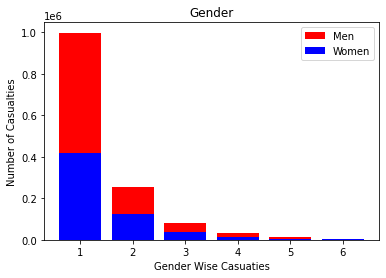

In [39]:
plt.bar(male_age_band,male_accident_count,label="Men",color='r')
plt.bar(female_age_band,female_accident_count,label="Women",color='b')
plt.legend()
plt.xlabel("Gender Wise Casuaties")
plt.ylabel("Number of Casualties")
plt.title("Gender")

In [40]:
combinedDF.printSchema()

root
 |-- Accident_Index: string (nullable = true)
 |-- Age_Band_of_Driver: string (nullable = true)
 |-- Age_of_Vehicle: string (nullable = true)
 |-- Driver_Home_Area_Type: string (nullable = true)
 |-- Driver_IMD_Decile: string (nullable = true)
 |-- Engine_Capacity_.CC.: string (nullable = true)
 |-- Hit_Object_in_Carriageway: string (nullable = true)
 |-- Hit_Object_off_Carriageway: string (nullable = true)
 |-- Journey_Purpose_of_Driver: string (nullable = true)
 |-- Junction_Location: string (nullable = true)
 |-- make: string (nullable = true)
 |-- model: string (nullable = true)
 |-- Propulsion_Code: string (nullable = true)
 |-- Sex_of_Driver: string (nullable = true)
 |-- Skidding_and_Overturning: string (nullable = true)
 |-- Towing_and_Articulation: string (nullable = true)
 |-- Vehicle_Leaving_Carriageway: string (nullable = true)
 |-- Vehicle_Location.Restricted_Lane: string (nullable = true)
 |-- Vehicle_Manoeuvre: string (nullable = true)
 |-- Vehicle_Reference: intege

In [41]:
newcombinedDF = combinedDF.select('make','road_type','Number_of_Casualties','Sex_of_Driver','Age_of_Vehicle','Speed_limit')

In [42]:
#newcombinedDF.na.drop(how="any").show()

In [43]:
newcombinedDF.printSchema()

root
 |-- make: string (nullable = true)
 |-- road_type: string (nullable = true)
 |-- Number_of_Casualties: integer (nullable = true)
 |-- Sex_of_Driver: string (nullable = true)
 |-- Age_of_Vehicle: string (nullable = true)
 |-- Speed_limit: string (nullable = true)



In [111]:
newcombinedDF = newcombinedDF.selectExpr("cast(Age_of_Vehicle as int) Age_of_Vehicle",
                                        "cast(Speed_limit as int) Speed_limit",
                                        "cast(make as string) make",
                                        "cast(road_type as string) road_type",
                                        "cast(Number_of_Casualties as int) Number_of_Casualties",
                                        "cast(Sex_of_Driver as string) Sex_of_Driver")
newcombinedDF.printSchema()
newcombinedDF.show(truncate=False)

root
 |-- Age_of_Vehicle: integer (nullable = true)
 |-- Speed_limit: integer (nullable = true)
 |-- make: string (nullable = true)
 |-- road_type: string (nullable = true)
 |-- Number_of_Casualties: integer (nullable = true)
 |-- Sex_of_Driver: string (nullable = true)



+--------------+-----------+----------+------------------+--------------------+-------------+
|Age_of_Vehicle|Speed_limit|make      |road_type         |Number_of_Casualties|Sex_of_Driver|
+--------------+-----------+----------+------------------+--------------------+-------------+
|null          |30         |AUDI      |Single carriageway|1                   |Male         |
|4             |30         |MERCEDES  |Single carriageway|1                   |Male         |
|14            |30         |HONDA     |Dual carriageway  |1                   |Female       |
|4             |30         |SUZUKI    |Single carriageway|1                   |Female       |
|7             |30         |KAWASAKI  |Single carriageway|1                   |Male         |
|9             |30         |ROVER     |Roundabout        |1                   |Male         |
|16            |30         |SAAB      |Single carriageway|1                   |Male         |
|3             |30         |PIAGGIO   |Single carriageway|1 

In [112]:
newcombinedDF.na.drop(how="any").show()

+--------------+-----------+----------------+------------------+--------------------+-------------+
|Age_of_Vehicle|Speed_limit|            make|         road_type|Number_of_Casualties|Sex_of_Driver|
+--------------+-----------+----------------+------------------+--------------------+-------------+
|             4|         30|        MERCEDES|Single carriageway|                   1|         Male|
|            14|         30|           HONDA|  Dual carriageway|                   1|       Female|
|             4|         30|          SUZUKI|Single carriageway|                   1|       Female|
|             7|         30|        KAWASAKI|Single carriageway|                   1|         Male|
|             9|         30|           ROVER|        Roundabout|                   1|         Male|
|            16|         30|            SAAB|Single carriageway|                   1|         Male|
|             3|         30|         PIAGGIO|Single carriageway|                   1|       Female|


In [113]:
# making a machine learning pipeline 
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier

stage_1 = StringIndexer(inputCol='make', outputCol='make_index')
stage_2 = StringIndexer(inputCol='road_type', outputCol='road_type_index')
stage_3 = StringIndexer(inputCol='Sex_of_Driver', outputCol='Sex_of_Driver_index')


In [114]:
indexed_1=stage_1.fit(newcombinedDF).transform(newcombinedDF)
indexed_2=stage_2.fit(indexed_1).transform(indexed_1)
indexed_3=stage_3.fit(indexed_2).transform(indexed_2)
indexed_3.show(2)

+--------------+-----------+--------+------------------+--------------------+-------------+----------+---------------+-------------------+
|Age_of_Vehicle|Speed_limit|    make|         road_type|Number_of_Casualties|Sex_of_Driver|make_index|road_type_index|Sex_of_Driver_index|
+--------------+-----------+--------+------------------+--------------------+-------------+----------+---------------+-------------------+
|          null|         30|    AUDI|Single carriageway|                   1|         Male|      14.0|            0.0|                0.0|
|             4|         30|MERCEDES|Single carriageway|                   1|         Male|       7.0|            0.0|                0.0|
+--------------+-----------+--------+------------------+--------------------+-------------+----------+---------------+-------------------+
only showing top 2 rows



In [118]:
cols=('make','road_type','Sex_of_Driver', 'Sex_of_Driver_encoded', 'Age_of_Vehicle')
newIndexed = indexed_3.drop(*cols)

In [119]:
newIndexed.columns

['Speed_limit',
 'Number_of_Casualties',
 'make_index',
 'road_type_index',
 'Sex_of_Driver_index']

In [120]:
newIndexedDF = newIndexed.selectExpr("cast(make_index as int) make_index",
                                     "cast(road_type_index as int) road_type_index",
                                        "cast(Number_of_Casualties as int) Number_of_Casualties",
                                        "cast(Sex_of_Driver_index as int) Sex_of_Driver_index")
newIndexedDF.printSchema()
newIndexedDF.na.drop().show(truncate=False)

root
 |-- make_index: integer (nullable = true)
 |-- road_type_index: integer (nullable = true)
 |-- Number_of_Casualties: integer (nullable = true)
 |-- Sex_of_Driver_index: integer (nullable = true)



+----------+---------------+--------------------+-------------------+
|make_index|road_type_index|Number_of_Casualties|Sex_of_Driver_index|
+----------+---------------+--------------------+-------------------+
|14        |0              |1                   |0                  |
|7         |0              |1                   |0                  |
|6         |1              |1                   |1                  |
|15        |0              |1                   |1                  |
|28        |0              |1                   |0                  |
|16        |2              |1                   |0                  |
|36        |0              |1                   |0                  |
|30        |0              |1                   |1                  |
|12        |1              |4                   |1                  |
|19        |0              |1                   |1                  |
|13        |0              |1                   |0                  |
|2         |0       

In [121]:
from pyspark.sql.functions import col,sum
newIndexedDF.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in newIndexedDF.columns)).show()

+----------+---------------+--------------------+-------------------+
|make_index|road_type_index|Number_of_Casualties|Sex_of_Driver_index|
+----------+---------------+--------------------+-------------------+
|         0|              0|                   0|                  0|
+----------+---------------+--------------------+-------------------+



In [122]:
featureAssembler = VectorAssembler(inputCols=['Number_of_Casualties', 'make_index', 'road_type_index'], outputCol="features")

In [123]:
output = featureAssembler.transform(newIndexedDF)

In [124]:
output.columns

['make_index',
 'road_type_index',
 'Number_of_Casualties',
 'Sex_of_Driver_index',
 'features']

In [125]:
final_data = output.select("features", "Sex_of_Driver_index")

In [126]:
final_data.show()

+--------------+-------------------+
|      features|Sex_of_Driver_index|
+--------------+-------------------+
|[1.0,14.0,0.0]|                  0|
| [1.0,7.0,0.0]|                  0|
| [1.0,6.0,1.0]|                  1|
|[1.0,15.0,0.0]|                  1|
|[1.0,28.0,0.0]|                  0|
|[1.0,16.0,2.0]|                  0|
|[1.0,36.0,0.0]|                  0|
|[1.0,30.0,0.0]|                  1|
|[4.0,12.0,1.0]|                  1|
|[1.0,19.0,0.0]|                  1|
|[1.0,13.0,0.0]|                  0|
| [1.0,2.0,0.0]|                  0|
|[1.0,27.0,0.0]|                  0|
|[1.0,30.0,0.0]|                  0|
|[1.0,28.0,0.0]|                  0|
| [1.0,0.0,0.0]|                  0|
| [1.0,7.0,1.0]|                  0|
| [1.0,3.0,0.0]|                  0|
|[1.0,59.0,1.0]|                  0|
| [1.0,5.0,0.0]|                  0|
+--------------+-------------------+
only showing top 20 rows



In [127]:
# regression model linear regression
from pyspark.ml.regression import LinearRegression
train_data, test_data = final_data.randomSplit([0.70, 0.30])
lr_model = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, featuresCol="features", labelCol="Sex_of_Driver_index")
lr_model = lr_model.fit(train_data)

In [128]:
lr_model.coefficients

DenseVector([0.0, 0.0, 0.0])

In [129]:
lr_model.intercept

0.36341595930480664

In [130]:
pred_result = lr_model.evaluate(test_data)

In [131]:
pred_result.predictions.show()

+-------------+-------------------+-------------------+
|     features|Sex_of_Driver_index|         prediction|
+-------------+-------------------+-------------------+
|[1.0,0.0,0.0]|                  0|0.36341595930480664|
|[1.0,0.0,0.0]|                  0|0.36341595930480664|
|[1.0,0.0,0.0]|                  0|0.36341595930480664|
|[1.0,0.0,0.0]|                  0|0.36341595930480664|
|[1.0,0.0,0.0]|                  0|0.36341595930480664|
|[1.0,0.0,0.0]|                  0|0.36341595930480664|
|[1.0,0.0,0.0]|                  0|0.36341595930480664|
|[1.0,0.0,0.0]|                  0|0.36341595930480664|
|[1.0,0.0,0.0]|                  0|0.36341595930480664|
|[1.0,0.0,0.0]|                  0|0.36341595930480664|
|[1.0,0.0,0.0]|                  0|0.36341595930480664|
|[1.0,0.0,0.0]|                  0|0.36341595930480664|
|[1.0,0.0,0.0]|                  0|0.36341595930480664|
|[1.0,0.0,0.0]|                  0|0.36341595930480664|
|[1.0,0.0,0.0]|                  0|0.36341595930

In [132]:
pred_result.meanAbsoluteError, pred_result.meanSquaredError

(0.4886471122869282, 0.3025761109765739)

In [133]:
#classification model Logistic regression
lg_model = LogisticRegression(featuresCol="features", labelCol="Sex_of_Driver_index")
lg_model = lg_model.fit(train_data)

In [134]:
lg_model.coefficientMatrix

DenseMatrix(4, 3, [0.1472, 0.0131, 0.0465, 0.1654, -0.0022, 0.0381, -0.2508, -0.0072, -0.0715, -0.0618, -0.0036, -0.0132], 1)

In [136]:
lg_result = lg_model.evaluate(test_data)
lg_result.predictions.show()

+-------------+-------------------+--------------------+--------------------+----------+
|     features|Sex_of_Driver_index|       rawPrediction|         probability|prediction|
+-------------+-------------------+--------------------+--------------------+----------+
|[1.0,0.0,0.0]|                  0|[3.21262111961327...|[0.62758363803417...|       0.0|
|[1.0,0.0,0.0]|                  0|[3.21262111961327...|[0.62758363803417...|       0.0|
|[1.0,0.0,0.0]|                  0|[3.21262111961327...|[0.62758363803417...|       0.0|
|[1.0,0.0,0.0]|                  0|[3.21262111961327...|[0.62758363803417...|       0.0|
|[1.0,0.0,0.0]|                  0|[3.21262111961327...|[0.62758363803417...|       0.0|
|[1.0,0.0,0.0]|                  0|[3.21262111961327...|[0.62758363803417...|       0.0|
|[1.0,0.0,0.0]|                  0|[3.21262111961327...|[0.62758363803417...|       0.0|
|[1.0,0.0,0.0]|                  0|[3.21262111961327...|[0.62758363803417...|       0.0|
|[1.0,0.0,0.0]|      

In [139]:
lg_result.accuracy

0.6715085337502329

In [141]:
rf_model = RandomForestClassifier(featuresCol="features", labelCol="Sex_of_Driver_index")
rf_model.fit(train_data)

22/06/24 04:04:59 WARN MemoryStore: Not enough space to cache rdd_1603_4 in memory! (computed 27.4 MiB so far)
22/06/24 04:04:59 WARN MemoryStore: Not enough space to cache rdd_1603_1 in memory! (computed 17.8 MiB so far)
22/06/24 04:04:59 WARN MemoryStore: Not enough space to cache rdd_1603_2 in memory! (computed 27.4 MiB so far)
22/06/24 04:04:59 WARN MemoryStore: Not enough space to cache rdd_1603_0 in memory! (computed 3.4 MiB so far)
22/06/24 04:05:00 WARN BlockManager: Persisting block rdd_1603_2 to disk instead.
22/06/24 04:05:00 WARN BlockManager: Persisting block rdd_1603_0 to disk instead.
22/06/24 04:05:00 WARN BlockManager: Persisting block rdd_1603_4 to disk instead.
22/06/24 04:05:00 WARN BlockManager: Persisting block rdd_1603_1 to disk instead.


RandomForestClassificationModel: uid=RandomForestClassifier_e1cec5b369c2, numTrees=20, numClasses=4, numFeatures=3